Image Automation Version 1:
Detects face of construction worker and based on face dimensions, resizes hard hat image.
Then randomizes location of the placement of hard hat on image and produces 10 new images
to augment to the image dataset.

When transfering to the server, make following changes:
imagePath = "VOC2028/JPEGImages/imageName.jpg"
tempImgName = "/home/anushka/Datasets/VOC2028/JPEGImages/SuperimposedImages/"

To do's:
1. Write method to ensure that hat is not placed on face
2. Train model using augmented dataset

In [50]:
#importing necessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pylab import *
import random
import sys

In [51]:
#Load and treat image
imagePath = "/home/sahil/sahil_project/000002.jpg"

#name of image that will be saved
imgName = "000002"

#hat path name
randomNum = random.randint(1,5)
hatPath = "orangeHat.png"
if(randomNum == 1):
    hatPath = "orangeHat.png"
#if(randomNum == 2):
   # hatPath = "blueHat.png"
if(randomNum == 3):
    hatPath = "pinkHat.png"
if(randomNum == 4):
    hatPath = "limeHat.png"



In [52]:
pwd

'/home/sahil/sahil_project'

In [53]:
xvalue=[]
yvalue=[]
width=[]
height=[]
def avgbndbox(filename):
    file=open(filename,"r")
    xmin=0
    ymin=0
    xmax=0
    ymax=0
    counter=0
    while True:
        line = file.readline()
        if not line:
            break
        if line.find("<bndbox>")!=-1:
            temp=int(file.readline().strip("<xmin>/ \t\n"))
            xvalue.append(temp)
            xmin=xmin+temp
            temp=int(file.readline().strip("<ymin>/ \t\n"))
            yvalue.append(temp)
            ymin=ymin+temp
            temp=int(file.readline().strip("<xmax>/ \t\n"))
            width.append(temp-xvalue[counter])
            xmax=xmax+temp
            temp=int(file.readline().strip("<ymax>/ \t\n"))
            height.append(temp-yvalue[counter])
            ymax=ymax+temp
            counter=counter+1
    file.close()        
    avgwidth=int((xmax-xmin)/counter)
    avgheight=int((ymax-ymin)/counter)
    return avgwidth,avgheight,counter

avgwidth,avgheight,count=avgbndbox("/home/sahil/sahil_project/000002.xml")

print("average width: {}".format(avgwidth))
print("average height: {}".format(avgheight))


average width: 36
average height: 49


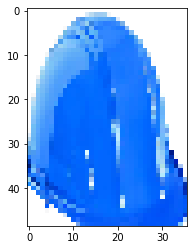

True

In [54]:
helmetImage = cv2.imread(hatPath, cv2.IMREAD_UNCHANGED)
#imshow(helmetImage)
#show()

new_helmet = cv2.resize(helmetImage, (avgwidth, avgheight))
imshow(new_helmet)
show()
cv2.imwrite("hat.png", new_helmet)

In [55]:
 #method for checking if hat is placed on coordinates of face
def checkOverlap(locX, locY, x, y, w, h):
    if(locX >= x and locX <= x+w and locY >= y and locY <= y+h):
        #hat location overlaps with face bounding box
        return True
    else:
        return False

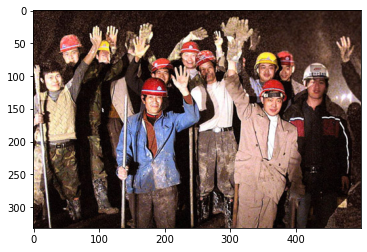

image width =  500
image height =  332
36
49
5
3
1
/home/sahil/sahil_project/AugImages/000002_1.jpg


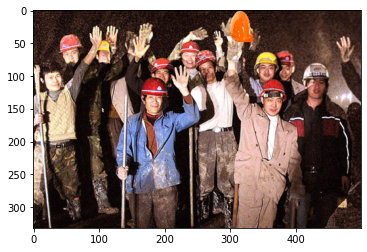

2
/home/sahil/sahil_project/AugImages/000002_2.jpg


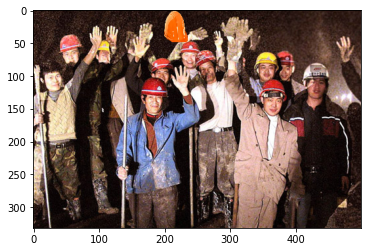

3
/home/sahil/sahil_project/AugImages/000002_3.jpg


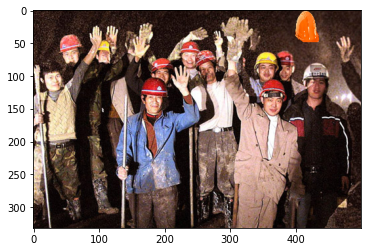

4
/home/sahil/sahil_project/AugImages/000002_4.jpg


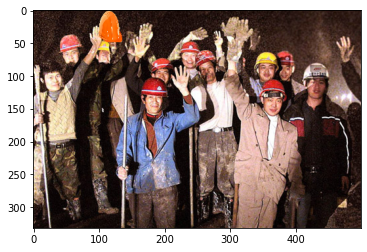

5
/home/sahil/sahil_project/AugImages/000002_5.jpg


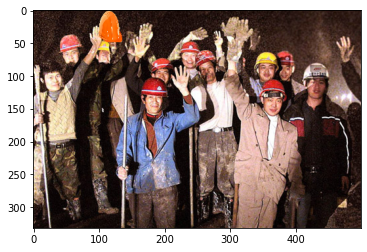

6
/home/sahil/sahil_project/AugImages/000002_6.jpg


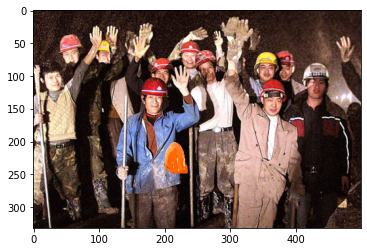

7
/home/sahil/sahil_project/AugImages/000002_7.jpg


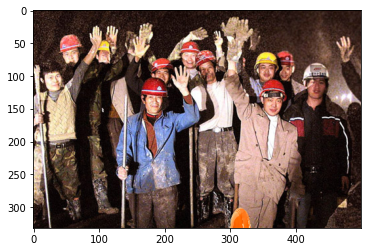

8
/home/sahil/sahil_project/AugImages/000002_8.jpg


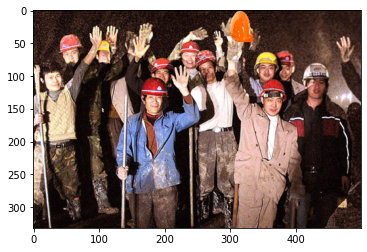

9
/home/sahil/sahil_project/AugImages/000002_9.jpg


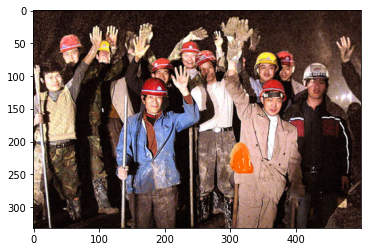

10
/home/sahil/sahil_project/AugImages/000002_10.jpg


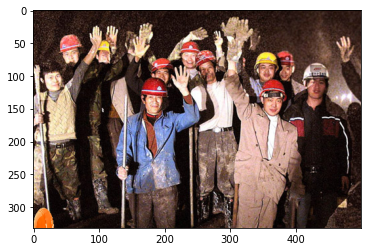

In [56]:
hat = Image.open("hat.png")
backgroundImage = Image.open(imagePath)
imshow(backgroundImage)
show()
#initialize location variables
locationX = 0
locationY = 0

hatWidth = hat.size[0]
hatHeight = hat.size[1]

imageWidth = round((backgroundImage.size[0]-hatWidth)/100)
imageHeight = round((backgroundImage.size[1]-hatHeight)/100)
print("image width = ", backgroundImage.size[0])
print("image height = ", backgroundImage.size[1])
print(hatWidth)
print(hatHeight)

#for loop with randomizer -> run 10 times
print(imageWidth)
print(imageHeight)
for i in range(1,11):
    print(i)
    #reset background image
    tempBack = Image.open(imagePath) 
    #initialize boolean variable for while loop
    isChecking = True
    #while loop to randomize location variable and check for overlap
    while(isChecking):
        #initialize location variables
        locationX = (random.randint(0,imageWidth))*100
        locationY = (random.randint(0,imageHeight))*100
        isOnFace = False
        #loop through each face and compare hat coordinates and face coordinates
        for j in range(0,count):
            isOnFace = checkOverlap(locationX, locationY, xvalue[j], yvalue[j], width[j], height[j])
            #if overlap on even one face then generate a new location variable
            if(isOnFace == True):
                break
        isChecking = isOnFace
    tempBack.paste(hat, (locationX,locationY), hat)
    tempImgName = "/home/sahil/sahil_project/AugImages/"+imgName + "_" + str(i) + ".jpg"
    print(tempImgName)
    #save image to folder
    tempBack.save(tempImgName, "JPEG")
    imshow(tempBack)
    show()